<a href="https://colab.research.google.com/github/mascneto/IrisDataSet/blob/master/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
sns.set()

In [3]:
data = datasets.load_iris()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df = pd.DataFrame(data['data'], columns=data.feature_names)
"""
 Target é a variável que estamos tentando prever quando construímos um modelo de ML.
 O objetivo é que o  modelo seha capaz de prever corretamente a espécie da íris com base nos dados.
"""
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
### Basic descriptive statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


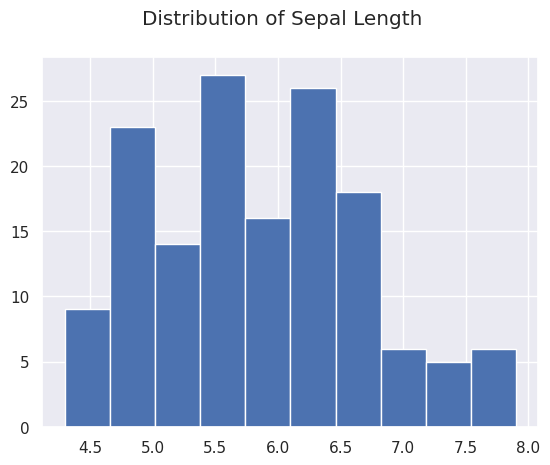

In [9]:
# Distribution of features and targets
df['sepal length (cm)'].hist()
plt.suptitle('Distribution of Sepal Length')
plt.show()

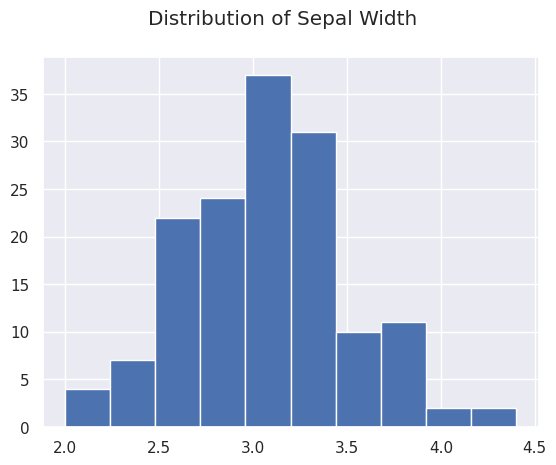

In [10]:
df['sepal width (cm)'].hist()
plt.suptitle('Distribution of Sepal Width')
plt.show()

In [11]:
# Relationship of data features with target
df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
# Create new columns with species name
df['target_name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


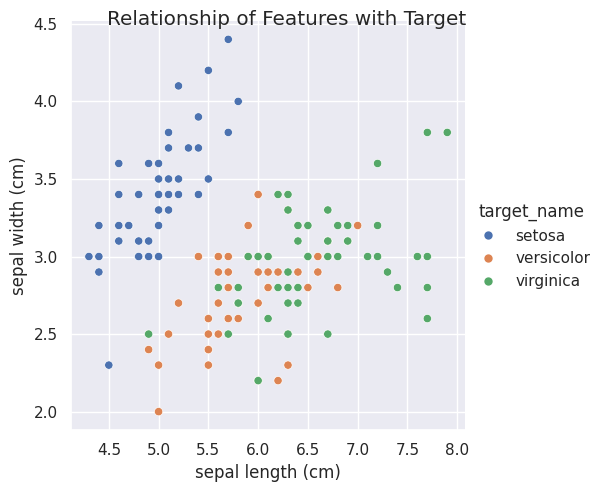

In [12]:
sns.relplot(x='sepal length (cm)', y='sepal width (cm)', hue='target_name', data=df)
plt.suptitle('Relationship of Features with Target')
plt.show()

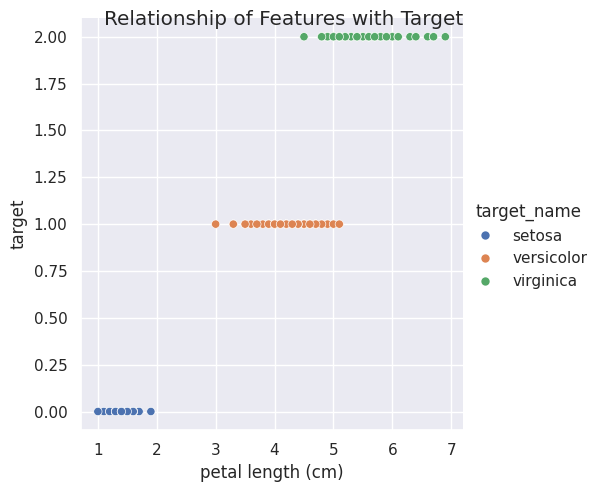

In [13]:
sns.relplot(x='petal length (cm)', y='target', hue='target_name', data=df)
plt.suptitle('Relationship of Features with Target')
plt.show()

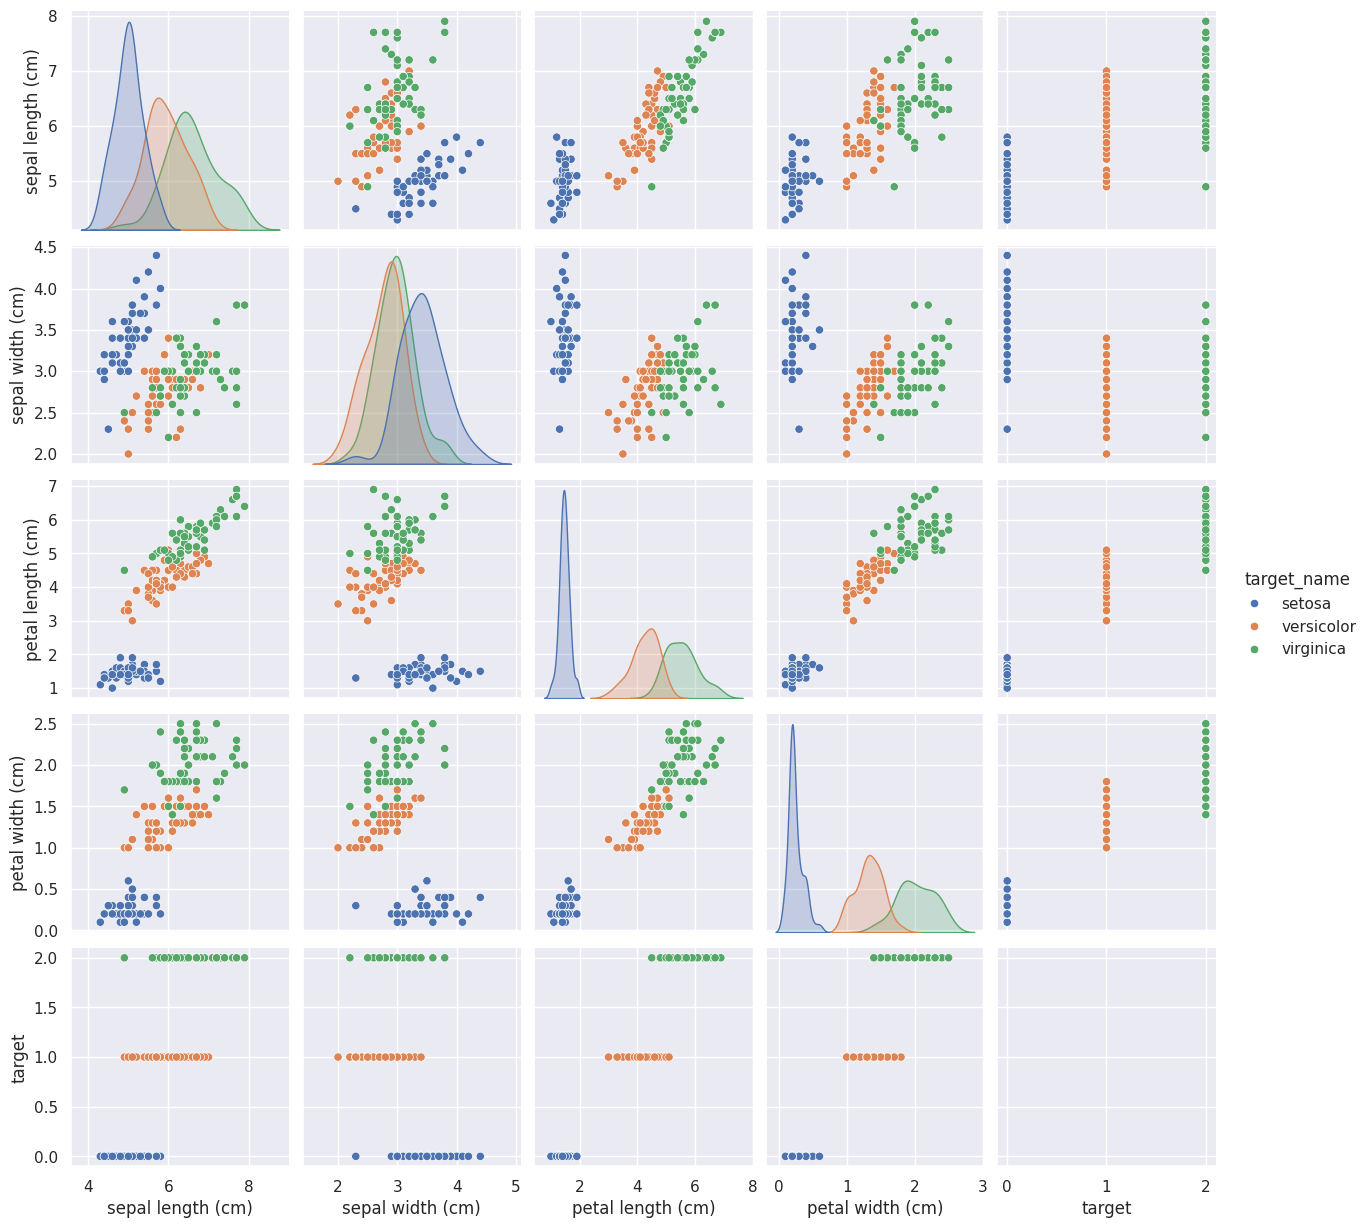

In [14]:
"""
O sns.pairplot cria uma matriz onde cada linha e coluna representa uma variável
e cada célula da matriz representa a correlação entre as variáveis.
"""

sns.pairplot(df, hue='target_name')
plt.show()

In [15]:
# Train test split
from sklearn.model_selection import train_test_split

In [16]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=42)

In [17]:
print(df_train.shape, df_test.shape)

(112, 6) (38, 6)


In [18]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
4,5.0,3.6,1.4,0.2,0,setosa
32,5.2,4.1,1.5,0.1,0,setosa
142,5.8,2.7,5.1,1.9,2,virginica
85,6.0,3.4,4.5,1.6,1,versicolor
86,6.7,3.1,4.7,1.5,1,versicolor


In [19]:
# Prepare data for modeling
X_train = df_train.drop(['target', 'target_name'], axis=1).values # exclui as colunas (axis=1) 'target' e 'target_name'; O values transforma num array NumPy
y_train = df_train['target'].values
X_test = df_test.drop(['target', 'target_name'], axis=1).values
y_test = df_test['target'].values

In [20]:
X_train
y_train

array([0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 2])

In [21]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

A classe `LinearRegression` é  usada para ajustar uma reta (ou hiperplano) que minimiza os **erros quadráticos** entre os valores reais e os valores preditos
`reg.fit(X_train, y_train)` treina o modelo com os dados de treino onde:


*   `X_train`: Dados de entrada (features);
*   `y_train`: Variáveis de saída (target).

O método `fit` ajusta os **coeficientes** e o **intercepto** da regressão linear com base nos dados.

A fórmula da regressão linear é dada por

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$




In [22]:
reg = linear_model.LinearRegression() # cria uma instância do modelo de Regressão Linear
reg.fit(X_train, y_train)

LinearRegression()

In [23]:
reg.coef_ # Coeficientes das variáveis

array([-0.11548607, -0.05327186,  0.26631062,  0.52537257])

In [24]:
reg.intercept_ # Intercepto

0.21023176385323394

In [25]:
y_pred =  reg.predict(X_test)
y_pred

array([ 1.23871249, -0.04013211,  2.22838234,  1.34928356,  1.28957782,
        0.01509759,  1.05072392,  1.81477615,  1.36347665,  1.06563701,
        1.69803163, -0.07854485, -0.16011484, -0.06878958, -0.02410259,
        1.39912838,  2.00017795,  1.04685134,  1.28418206,  1.9691188 ,
        0.02814876,  1.59654379,  0.08792308,  1.91658154,  1.85059181,
        1.86983162,  1.79356763,  2.03404607,  0.02652966,  0.02192734,
       -0.14139774, -0.07282009,  1.17862062,  0.00594578, -0.0170986 ,
        1.67925082,  1.28710758, -0.07220689])

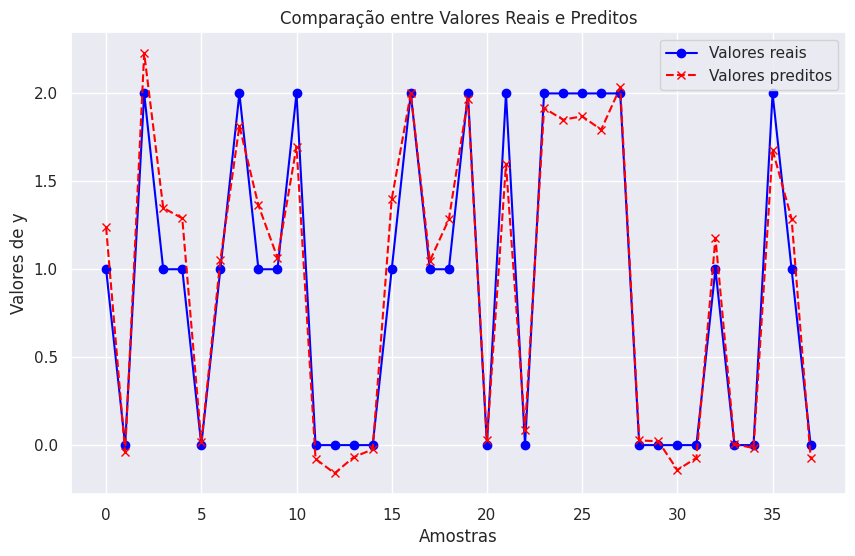

In [26]:
plt.figure(figsize=(10, 6))

# Gráfico valores reais
plt.plot(y_test,  label='Valores reais', color='blue', linestyle='-', marker='o')

# Gráfico valores preditos
plt.plot(y_pred, label='Valores preditos', color='red', linestyle='--', marker='x')

# Configurando gráfico
plt.title('Comparação entre Valores Reais e Preditos')
plt.xlabel('Amostras')
plt.ylabel('Valores de y')
plt.legend()
plt.grid(True)
plt.show()

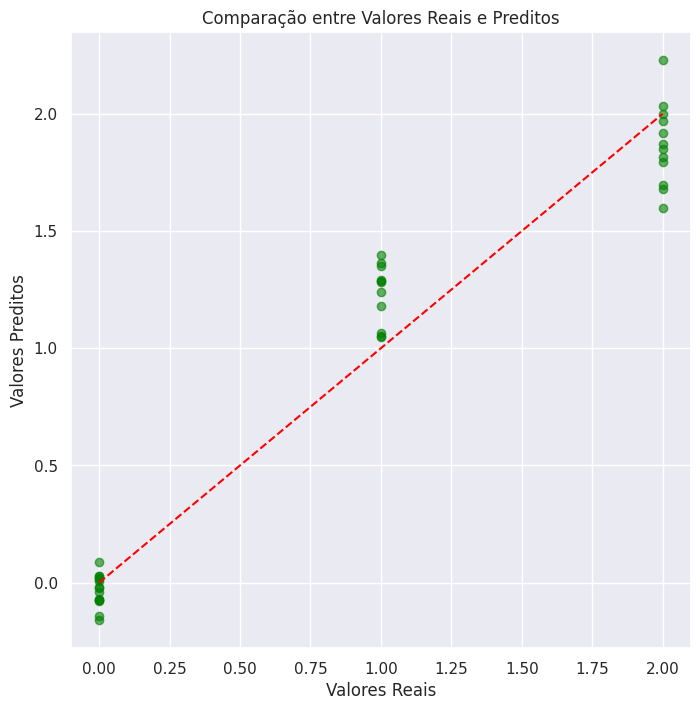

In [27]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação entre Valores Reais e Preditos')
plt.show()

Por se tratar de um problema de **classificação**, o modelo de regressão acaba não sendo o aquedado, sendo assim, os resultados são ruins.

Para o *dataset* Iris, podemos usar **modelos de classificação**, como:

*   LogisticRegression
*   RandomForestClassifier
*   KNighborsClassifier
*   DecisionTreeClassifier
*   Support Vector Machine (SVM)





In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# Instanciar o modelo
model = LogisticRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazeer previsões
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [29]:
# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [30]:
# Fornece uma visão abrangente sobre o desempenho do modelo de classificação
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



##### Confusion Matrix
Ela mostra o número de **verdadeiros positivos, falsos positivos, verdadeiros negativos ** e **falsos negativos**


* Verdadeiros positivos (TP): O modelo acertou as instâncias da classe positiva.
* Falsos positivos (FP): O modelo previu incorretamente a classe positiva.
* Verdadeiros negativos (TN): O modelo acertou as instâncias da classe negativa.
* Falsos negativos (FN): O modelo previu incorretamente a classe negativa.

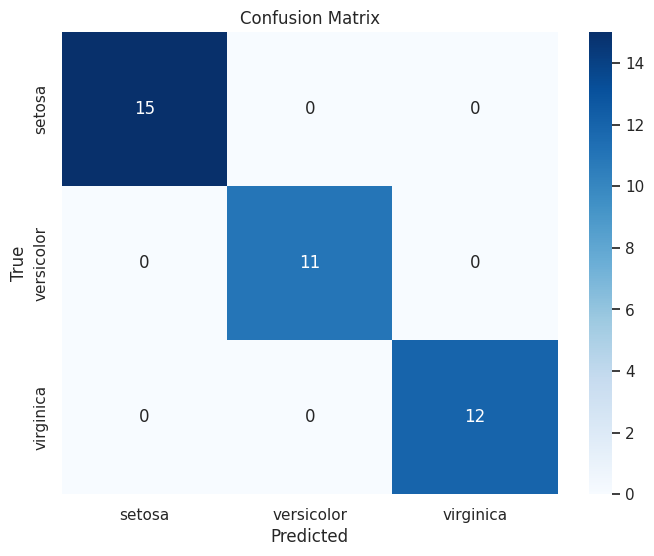

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Criar e treinar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

1.0

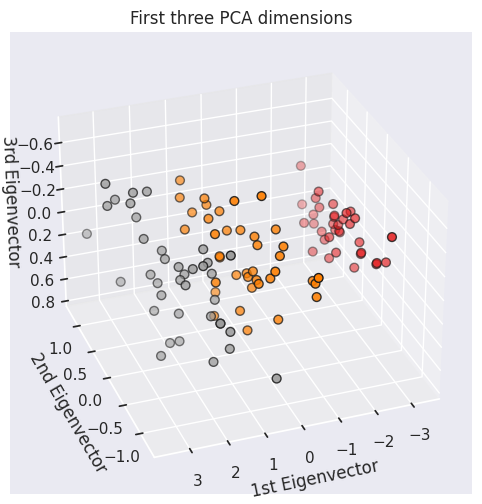

In [46]:
import mpl_toolkits.mplot3d

from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X_train)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y_train,
    cmap=plt.cm.Set1,
    edgecolor='k',
    s=40,
)

ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)

plt.show()
